In [1]:
from google.colab import files
uploaded = files.upload()

Saving class_inputs.csv to class_inputs.csv
Saving class_outputs.csv to class_outputs.csv


In [2]:
import numpy as np
import csv
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import balanced_accuracy_score
from keras.utils.np_utils import to_categorical
from sklearn.preprocessing import StandardScaler

from keras.models import Model
from keras import layers
from keras.layers import Input
from keras import optimizers



In [3]:
df_in = pd.read_csv('class_inputs.csv', na_values="NONE" )
df_target = pd.read_csv('class_outputs.csv', na_values="NONE" ) 



IN_X1=df_in.to_numpy()
IN_Y=df_target.to_numpy()


scaler = StandardScaler()
IN_X = scaler.fit_transform(IN_X1[:,2:])
feat_dim = 28


In [4]:
IN_X

array([[-0.01952029, -0.01486324, -0.25921278, ..., -0.18228974,
        -0.42847811, -1.17181785],
       [-0.01963504, -0.0149087 , -0.25921278, ..., -0.18228974,
         2.3338415 , -1.17181785],
       [-0.01955854, -0.01495416, -0.25921278, ..., -0.18228974,
         2.3338415 , -1.1710047 ],
       ...,
       [-0.01959679, -0.01459046, -0.16404937, ..., -0.18228974,
        -0.42847811,  1.88481947],
       [ 0.44046442, -0.01249917, -0.16404937, ..., -0.18228974,
        -0.42847811,  2.44833362],
       [-0.01691935, -0.0149087 , -0.16404937, ..., -0.18228974,
        -0.42847811,  0.09588568]])

In [5]:

IN_train, IN_valid, O_train, O_valid = train_test_split(IN_X.reshape((-1,feat_dim,1)), IN_Y.reshape((-1,1)), test_size=0.1, random_state=1)


O_train_cat=to_categorical(O_train, num_classes = 8)

In [6]:
# from sklearn.decomposition import PCA

# pca = PCA(.95)
# print(IN_train.shape)
# pca.fit(IN_train.reshape((-1,28)))
# IN_train = pca.transform(IN_train.reshape((-1,28)))
# IN_valid = pca.transform(IN_valid.reshape((-1,28)))
# new_feat_dim = IN_valid.shape[1]
# print(new_feat_dim)

In [7]:
def Reg_Hadi():
    inputs = Input(shape=(feat_dim, 1))
    # x = layers.BatchNormalization()(inputs)
    x = layers.LSTM(256, batch_input_shape=(None, feat_dim, 1),return_sequences=True)(inputs)
    x = layers.LSTM(128,return_sequences=True)(x)
    x = layers.LSTM(64,return_sequences=False)(x)
    x = layers.Dropout(0.25)(x)
    #        x = layers.LSTM(32,return_sequences=True)(x)
    #        x = layers.LSTM(32,return_sequences=True)(x)
    x = layers.Dense(8,activation='softmax')(x)
    model = Model(inputs=inputs, outputs=x, name='Utility2')
    return model


In [8]:
import keras
R_model_H = Reg_Hadi()

# es_callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=40)

# R_opt = optimizers.RMSprop(lr=1E-4, epsilon=1e-08,decay=0.8E-6)
R_opt = optimizers.Adam(lr=1E-4)

R_model_H.trainable = True
R_model_H.compile(optimizer=R_opt, loss='categorical_crossentropy',metrics=['accuracy'])

history = R_model_H.fit(IN_train,O_train_cat,epochs=300,batch_size=512, validation_split=0.05)

Epoch 1/300
808/808 [==============================] - 20s 15ms/step - loss: 1.8435 - accuracy: 0.3257 - val_loss: 1.6964 - val_accuracy: 0.3669
Epoch 2/300
808/808 [==============================] - 11s 14ms/step - loss: 1.6948 - accuracy: 0.3682 - val_loss: 1.6555 - val_accuracy: 0.3827
Epoch 3/300
808/808 [==============================] - 11s 14ms/step - loss: 1.6621 - accuracy: 0.3796 - val_loss: 1.6388 - val_accuracy: 0.3869
Epoch 4/300
808/808 [==============================] - 11s 14ms/step - loss: 1.6413 - accuracy: 0.3892 - val_loss: 1.6225 - val_accuracy: 0.3955
Epoch 5/300
808/808 [==============================] - 11s 14ms/step - loss: 1.6312 - accuracy: 0.3905 - val_loss: 1.6111 - val_accuracy: 0.3974
Epoch 6/300
808/808 [==============================] - 11s 14ms/step - loss: 1.6162 - accuracy: 0.3946 - val_loss: 1.6020 - val_accuracy: 0.3972
Epoch 7/300
808/808 [==============================] - 11s 14ms/step - loss: 1.6016 - accuracy: 0.3979 - val_loss: 1.5905 - val_ac

In [9]:
o_train_hat=R_model_H.predict(IN_train)
o_valid_hat=R_model_H.predict(IN_valid)



train_acc=balanced_accuracy_score(O_train.reshape((-1,)),np.argmax(o_train_hat,axis=-1).reshape((-1,)))
valid_acc=balanced_accuracy_score(O_valid.reshape((-1,)),np.argmax(o_valid_hat,axis=-1).reshape((-1,)))

In [10]:
valid_acc

0.3997601292669565

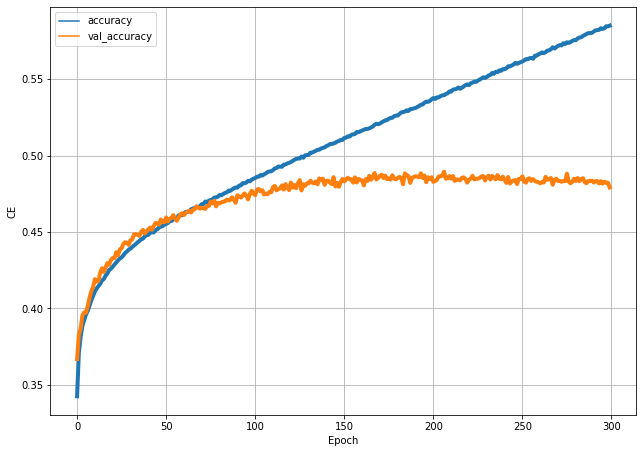

In [11]:
import matplotlib.pyplot as plt

lws = [4, 4]
ax=pd.DataFrame(history.history)

ax_plt = ax[['accuracy','val_accuracy']].plot(figsize=(8, 5))
for i, l in enumerate(ax_plt.lines):
    plt.setp(l, linewidth=lws[i])
plt.grid(True)
plt.ylabel('CE')
plt.xlabel('Epoch')
plt.rc('font', size=25)
plt.rc('axes', titlesize=25)
fig = plt.gcf()
fig.set_size_inches(10.5, 7.5)
fig.savefig('MSE.png', dpi=600,bbox_inches = 'tight')
plt.show()

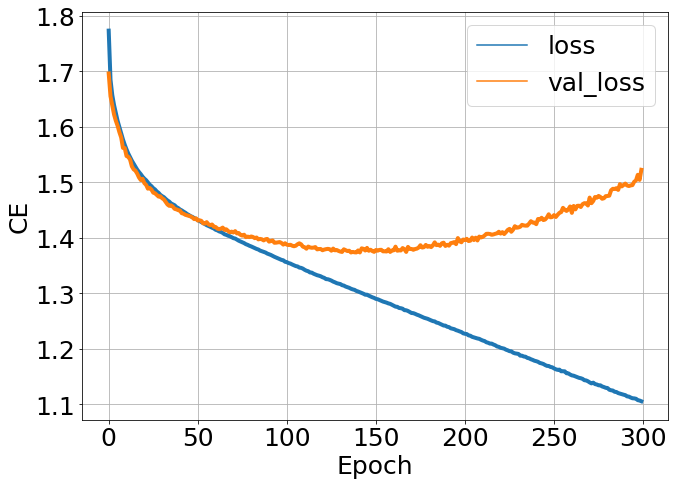

In [12]:
import matplotlib.pyplot as plt

lws = [4, 4]
ax=pd.DataFrame(history.history)

ax_plt = ax[['loss','val_loss']].plot(figsize=(8, 5))
for i, l in enumerate(ax_plt.lines):
    plt.setp(l, linewidth=lws[i])
plt.grid(True)
plt.ylabel('CE')
plt.xlabel('Epoch')
plt.rc('font', size=25)
plt.rc('axes', titlesize=25)
fig = plt.gcf()
fig.set_size_inches(10.5, 7.5)
fig.savefig('MSE.png', dpi=600,bbox_inches = 'tight')
plt.show()

In [13]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,1.773642,0.342487,1.696429,0.366866
1,1.685197,0.371020,1.655517,0.382721
2,1.657398,0.381346,1.638785,0.386903
3,1.639357,0.388723,1.622457,0.395450
4,1.624923,0.392433,1.611140,0.397426
...,...,...,...,...
295,1.110695,0.582991,1.501257,0.481710
296,1.110001,0.583381,1.503623,0.482950
297,1.107519,0.584735,1.513714,0.482215
298,1.106811,0.584631,1.504564,0.482261
